In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")

# Chamar banco vacinas
df1 = pd.read_csv('Arquivos/SESRS_VAC_APLICACAO_08_02_2022-08_54.csv', sep=';', encoding='cp1252', usecols=['DATA', 'COUNT'])
# Chamar banco EAPV
df2 = pd.read_excel('Relatorios/evento_adverso.xlsx', usecols=['DATA DE INICIO'])

In [2]:
# Filtrar dados até 05/02
df1 = df1[df1['DATA'] <= '2022-02-05']
df2 = df2[df2['DATA DE INICIO'] <= '2022-02-05']

TRABALHANDO COM O BANCO VACINADOS

In [3]:
df_vacinas = df1.copy()
df_vacinas['COUNT'].sum()

20534730

In [4]:
# transformando em datetime
df_vacinas['DATA'] = pd.to_datetime(df_vacinas['DATA'])
# separando df de 2021 e 2022
# Insert Epidemiology Week number
df_vacinas.loc[(df_vacinas['DATA'] < '2022-01-01'), 'SE'] = df_vacinas['DATA'].dt.strftime('2021_' + '%U')
df_vacinas.loc[(df_vacinas['DATA'] >= '2022-01-01'), 'SE'] = df_vacinas['DATA'].dt.strftime('2022_' + '%U')

In [7]:
df_vacinas['SE'].unique()

array(['2022_05', '2022_04', '2022_03', '2021_30', '2021_31', '2021_44',
       '2021_45', '2021_46', '2021_47', '2021_48', '2021_49', '2021_50',
       '2021_52', '2022_01', '2021_37', '2021_42', '2021_43', '2021_32',
       '2021_36', '2021_33', '2021_35', '2021_41', '2021_51', '2022_02',
       '2021_29', '2021_38', '2021_34', '2021_39', '2021_40', '2021_17',
       '2021_23', '2021_18', '2021_22', '2021_28', '2021_19', '2021_04',
       '2021_26', '2021_13', '2021_06', '2021_21', '2021_03', '2021_27',
       '2021_24', '2021_25', '2021_12', '2021_11', '2021_09', '2021_05',
       '2021_20', '2021_15', '2021_10', '2021_16', '2021_14', '2021_07',
       '2021_08'], dtype=object)

In [6]:
# tratando o SE_00
df_vacinas.loc[df_vacinas['SE'] == '2022_00', 'SE'] = '2021_52'

TRABALHANDO COM BANCO EVENTOS

In [8]:
df_eventos = df2.copy()

In [9]:
# transformando em datetime
df_eventos['DATA DE INICIO'] = pd.to_datetime(df_eventos['DATA DE INICIO'])

In [10]:

# seprando 2021 e 2022
df_eventos.loc[(df_eventos['DATA DE INICIO'] < '2022-01-01'), 'SE'] = df_eventos['DATA DE INICIO'].dt.strftime('2021_' + '%U')
df_eventos.loc[(df_eventos['DATA DE INICIO'] >= '2022-01-01'), 'SE'] = df_eventos['DATA DE INICIO'].dt.strftime('2022_' + '%U')

In [11]:
df_eventos['SE'].unique()

array(['2021_42', '2021_43', '2021_40', '2021_25', '2021_44', '2021_29',
       '2021_41', '2021_27', '2021_30', '2021_23', '2021_26', '2021_31',
       '2021_37', '2021_39', '2021_33', '2021_45', '2021_22', '2021_34',
       '2021_38', '2021_32', '2021_46', '2021_17', '2021_14', '2021_28',
       '2021_10', '2021_47', '2021_20', '2021_18', '2021_15', '2021_36',
       '2021_13', '2021_35', '2021_24', '2021_48', '2021_49', '2021_04',
       '2021_50', '2021_05', '2021_51', '2021_07', '2021_08', '2021_09',
       '2021_12', '2021_52', '2022_01', '2022_00', '2022_02', '2022_03',
       '2022_04', '2022_05', '2021_21', '2021_16', '2021_19', '2021_06',
       '2021_03', '2021_11', '2021_01', '2021_00'], dtype=object)

FINAL

In [12]:
# juntando banco vacinas e eventos
df_final = df_vacinas.merge(df_eventos, on='SE', how='outer')

In [ ]:
# calculo de incidencia
df_final['incidencia_1000ds'] = round((df_final['EVENTOS']/df_final['APLICADAS']*1000),2)
df_final.head()

NameError: name 'df_final' is not defined

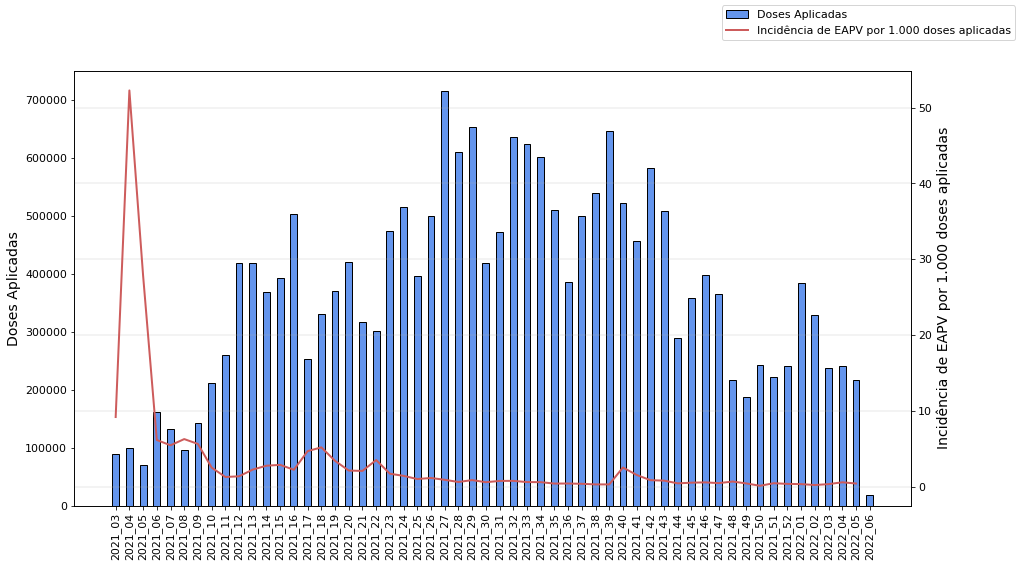

In [ ]:
# grafico
y1 = df_final['APLICADAS']           # Doses aplicadas
y2 = df_final['incidencia_1000ds']   # Incidencia
x = df_final['SE']                   # Semana epidemiologica

width = 0.50
plt.rcParams.update({'font.size':11})
fig, ax1 = plt.subplots(figsize = (15, 8))

ax1.bar(x, y1, width, color='cornflowerblue', label='Doses Aplicadas', edgecolor='#000000')
ax1.set_ylabel('Doses Aplicadas', fontsize=14)

ax1.tick_params('x', rotation=90)
ax2 = plt.twinx(ax1) #compartilhar o mesmo eixo x

ax2.plot(x, y2, linestyle='-', linewidth=2, color='indianred', label='Incidência de EAPV por 1.000 doses aplicadas')
ax2.set_ylabel('Incidência de EAPV por 1.000 doses aplicadas', fontsize=14)

fig.legend()
#fig.legend(loc="upper right", bbox_to_anchor=(0.92,0.98), bbox_transform=ax1.transAxes)
plt.grid(axis='y', linewidth=0.3)
plt.savefig('Graficos/Figura 1.png', dpi=800, bbox_inches='tight')
plt.show()